# **PCA + t-SNE con imágenes**

In [1]:
# Extendido de:
# http://scikit-learn.org/dev/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

t-SNE is initialized here with the embedding that is generated by PCA in
this example, which is not the default setting. It ensures global stability
of the embedding, i.e., the embedding does not depend on random
initialization.

In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

In [3]:
#digits = load_digits(n_class=6)
digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
size = int(np.sqrt(n_features))

print("n samples        =", n_samples)
print("n attributes     =", n_features)
print("digits           =", np.unique(y))
print("image dimensions = ", size, 'x', size)

n samples        = 1797
n attributes     = 64
digits           = [0 1 2 3 4 5 6 7 8 9]
image dimensions =  8 x 8


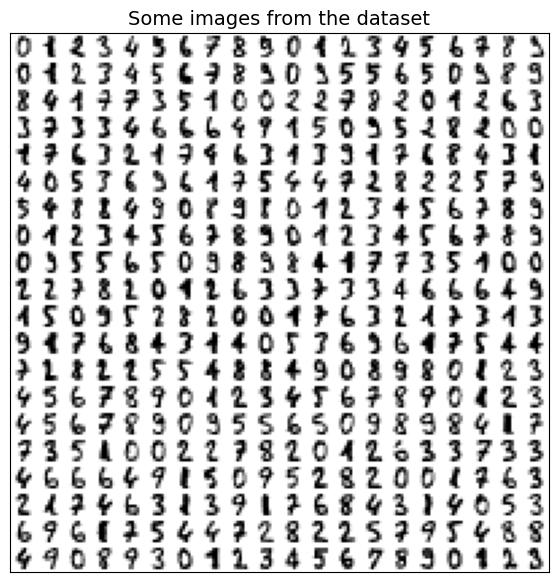

In [4]:
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + size, iy:iy + size] = X[i * n_img_per_row + j].reshape((size, size))

plt.figure(figsize=(7,7))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Some images from the dataset', fontsize=14)
plt.show()

In [5]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

sample 0 in the dataset:


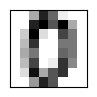

as vector:

 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

as matrix with dimensions 8 x 8 :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

The 'y' for this example is 0


In [6]:
example = 0
print("sample", example, "in the dataset:")
plt.figure(figsize=(1,1))
plt.imshow(X[example].reshape((size,size)), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('', fontsize=14)
plt.show()

print("as vector:\n\n", X[0])
print("\nas matrix with dimensions", size, "x", size, ":\n")
print(X[0].reshape((size,size)))
print("\nThe 'y' for this example is", y[example])

In [7]:
# Visualization of the embedding vectors
def plot_embedding(Xproj, y, images, title=None, figsize=None):
    xp_min, xp_max = np.min(Xproj, 0), np.max(Xproj, 0)
    Xproj = (Xproj - xp_min) / (xp_max - xp_min)

    plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    for xp,ys in zip(Xproj,y):
        plt.text(xp[0], xp[1], str(ys),
                 color=plt.cm.Set1(ys / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for xp,ys,im in zip(Xproj,y,images):
            dist = np.sum((xp - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [xp]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(im, cmap=plt.cm.gray_r),
                xp)
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [8]:
images = digits.images

In [9]:
description = 'PCA + t-SNE'
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
print("Computing "+description+" ...")
X_proj = tsne.fit_transform(X,y=None)
print("Elapsed time: %.2f seconds" % (time()-t0))

Computing PCA + t-SNE ...
Elapsed time: 27.99 seconds


Plotting projections (PCA + t-SNE) ...


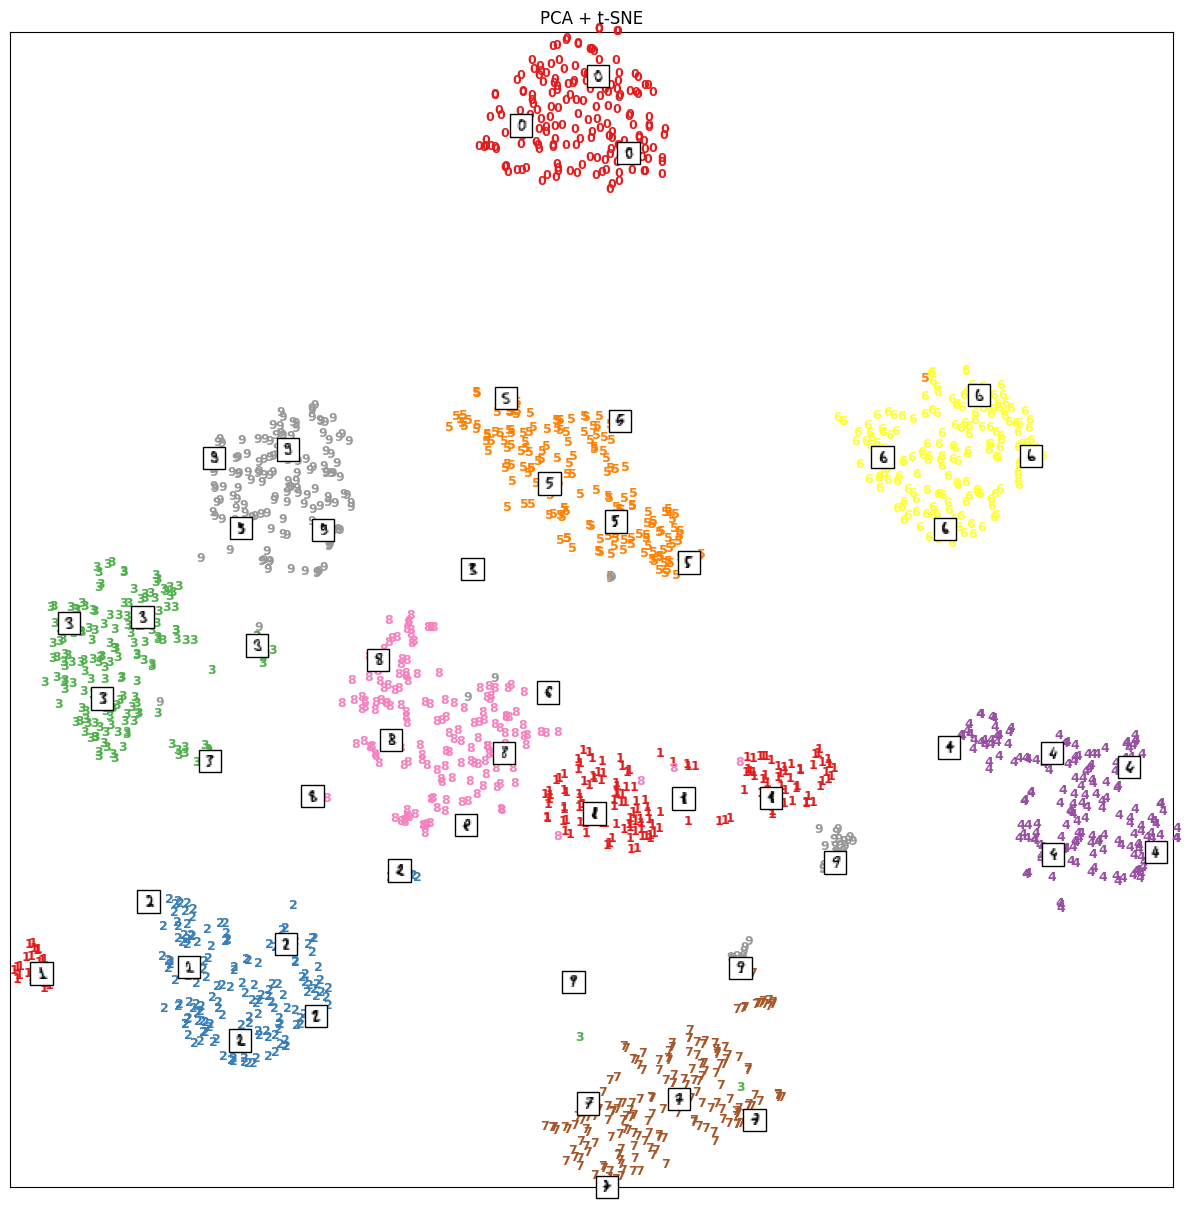

In [10]:
print("Plotting projections (PCA + t-SNE) ...")
plot_embedding(X_proj, y, images, description, figsize=(15,15))